# RNN (Recurrent Neural Network)

## Part-1 Data Preprocessing

### Importing the datas


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:,1:2].values

### Feature Scaling

In [5]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
   # StandardScaler ni Standardisation baisan bol,ene ni normalisation hiine.
scaler = MinMaxScaler(feature_range=(0,1)) #0ees 1 hoorond bolgono. ghdee default-aaraa ch bdg gjin.
training_set_scaled = scaler.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [8]:
# ene ni umnuh 60udriin shit harj baigaad l neg udriin stock price predict hiine gesen ug.

x_train = []
y_train = []
for i in range(60,1258) :
    x_train.append(training_set_scaled[i-60:i,0])  # 60 columntai shit uusgene. 60n previous day's prices.
    y_train.append(training_set_scaled[i,0])  # 1 l col baigaa.60dah udriin price
x_train,y_train = np.array(x_train) , np.array(y_train)

# tegeheer x_train ni 0oos tugsgul hurtel n baih ba
# y_train ni 60aas

### Reshaping

In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
 # 3dah dimension nemj 3d bolgoh gej baina.

## Part-2 Builiding and Training the RNN

### Importing the Keras libraries and packages

In [10]:
from keras.models import Sequential
from keras.layers import Dense, LSTM , Dropout

### Initialising the RNN

In [11]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [12]:
# dropout regularisation gedeg ni bol overfitting iin l esreg shit baina.
regressor.add(LSTM(units=50,return_sequences= True,input_shape=(x_train.shape[1],1)))
 # ehnii shape[1] gedeg ni bol, timestep number buyu 60.
 # 1: Refers to features per time step (e.g., one variable like stock price
regressor.add(Dropout(0.2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Adding a second LSTM layer and some Dropout regularisation

In [13]:
regressor.add(LSTM(units=50,return_sequences= True))
 # return_sequences gedeg ni bol ardaas ni ahiad , lstm layer baigaa yu ugui ui gej baina.
regressor.add(Dropout(0.2))
# randomly sets 20% of the LSTM neurons to 0 during training.

### Adding a third LSTM layer and some Dropout regularisation

In [14]:
regressor.add(LSTM(units=50,return_sequences= True))
regressor.add(Dropout(0.2))

### Adding a forth LSTM layer and some Dropout regularisation

In [15]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [16]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [17]:
regressor.compile(optimizer='adam',loss = "mean_squared_error")

### Fitting the RNN to the Training set

In [18]:
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step - loss: 0.0973
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.0071
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 148ms/step - loss: 0.0065
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - loss: 0.0057
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 147ms/step - loss: 0.0058
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 114ms/step - loss: 0.0063
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - loss: 0.0050
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.0047
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - loss: 0.0046
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - loss: 0.0048
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - loss: 0.0045
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - loss: 0.0041
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - loss: 0.0043
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - loss: 0.0041
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s

## Part-3 Making the predictions and visualising the results

### Getting the real stock price of 2017

In [19]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:,1:2].values

### Getting the predicted stock price of 2017

In [20]:
dataset_total = pd.concat((dataset_train["Open"],dataset_test["Open"]),axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values  # test_test bolon,60n timestep-iig avay gejiin.medeej test_set l turshih bolohoor, bas train_set-nii 60n shit ni predict hiihed heregtei.
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
x_test = []
for i in range(60,80) :
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


### Visualising the results

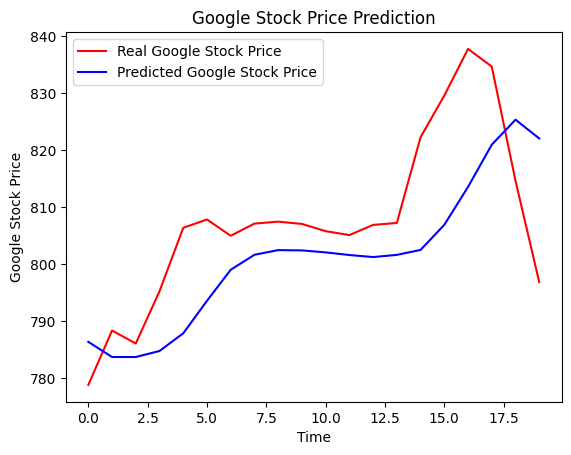

In [21]:
plt.plot(real_stock_price,color = "red",label="Real Google Stock Price")
plt.plot(predicted_stock_price,color="blue",label="Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()